## Predicting the Popularity of Songs

#### By AJ and Annie (Group A)

## Import Libraries

In [1]:
# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

#tensorflow imports
import tensorflow as tf
from tensorflow import keras

#sklearn imports
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import time 

#general libraries always needed
import pandas as pd
import numpy as np
import math

#plotting required modules
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FixedLocator, FixedFormatter

#sklearn clustering / unsupervised learning modules
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors

#sklearn modules for preprocessing and transformation
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Function Definitions

In [2]:
#function to verify the existence of a file in the current working directory and download it if not
import os,urllib, urllib.request, sys, tarfile
def downloadDataResource(file, sourcePath, compressed=None):
    if not os.path.isfile(file):
        try:
            urllib.request.urlretrieve(sourcePath+(compressed if compressed else file),(compressed if compressed else file))
            print("Downloaded", (compressed if compressed else file) )
            if compressed:
                ucomp = tarfile.open(compressed)
                ucomp.extractall()
                ucomp.close()
                print("File uncompressed.")
        except:
            print("ERROR: File", (compressed if compressed else file), "not found. Data source missing.")
    else:
        print("Data resource", file, "already downloaded.")

In [3]:
#function provided that plots the learning curve for neural networks
def nn_plot_learning_curve( history ):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    ymin, ymax = [], []
    for x in history.history.keys():
        ymax.append( max(history.history[x]))
        ymin.append( min(history.history[x]))
    plt.gca().set_ylim(min(ymin)*.95, max(ymax)*1.05)
    plt.xlabel("EPOCHS")
    plt.show()

In [4]:
#function to plot actual values vs. predicted values
def plot_actual_pred( actual, prediction ):
    plt.plot(actual, ".-", alpha=.6, label="Actual")
    plt.plot(prediction, ".-", alpha=.6, label="Prediction")
    plt.grid(True)
    plt.legend()
    plt.show()

In [5]:
#function that shows a learning curve for any model that has predict or fit methods
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator,X,y,ylim=None,cv=None,n_jobs=None,train_sizes=np.linspace(0.1, 1.0, 20),scoring = 'neg_root_mean_squared_error'):
    
    _, axes = plt.subplots(1, 1, figsize=(10, 5))    
    axes.set_title('Learning Curve')
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel(scoring)

    train_sizes, train_scores, test_scores= learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes,scoring = scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes,train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,alpha=0.1,color="r")
    axes.fill_between(train_sizes,test_scores_mean - test_scores_std,test_scores_mean + test_scores_std,alpha=0.1,color="g")
    axes.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    axes.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
    axes.legend(loc="best")
    plt.show()
    
    return

#code to prevent warnings that can occur as a result of this function
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [6]:
#function to create a silhouette diagram
#requires the model, the independent value (i.e. X) used to fit the model, and a list of k values to plot

def inertia_silhouette_plot( X, k_values): 

    #iterate through different k values and collect inertia values and silhouette scores
    kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, max(k_values)+1)]
    inertias = [model.inertia_ for model in kmeans_per_k]
    silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]    
    
    #print the silhouette scores and k values
    plt.plot(inertias)
    plt.ylabel("Inertia", fontsize=14)
    plt.xlabel("k Value", fontsize=14)
    plt.show()
    print("-"*80)
    #create the plot's figure
    plt.figure(figsize=(10, len(k_values)*3))

    ct = 0 #temp counter variable

    #build a subplot for each value of k
    for k in k_values:
    
        #create the subplot
        ct +=1
        plt.subplot(math.ceil(len(k_values)/2), 2, ct)
    
        #get the predictions and silhouette value
        y_pred = kmeans_per_k[k - 1].labels_
        silhouette_coefficients = silhouette_samples(X, y_pred)

        #create the bars for each cluster
        padding = len(X) // 30
        pos = padding
        ticks = []
        for i in range(k):
            coeffs = silhouette_coefficients[y_pred == i]
            coeffs.sort()

            color = mpl.cm.Spectral(i / k)
            plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append(pos + len(coeffs) // 2)
            pos += len(coeffs) + padding

        plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
        plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

       #plot the silhouette line
        plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
        
        #chart title
        plt.title("k={} --- {:.2}".format(k, silhouette_scores[k - 2]), fontsize=16)
 
        #add a y label for each row and an x axis label for the last 2 graphs
        if ct%2 == 1:
            plt.ylabel("Cluster")
        if ct == len(k_values) or ct==len(k_values)-1:
            #plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
            plt.xlabel("Silhouette Coefficient")
                
    #plot
    plt.show()

In [7]:
#function to create a 2 dimmensional representation of data using tSNE
#needs the independent data as well as Y label data OR prediction
def tsne_plot(X, y):
    X_tsne = TSNE(learning_rate=1000, perplexity=25, init="random").fit_transform(X)
    plt.figure(1, facecolor='white', figsize=(10, 12))
    a=plt.scatter(
        X_tsne[(y!=-1), 0],
        X_tsne[(y!=-1), 1],
        s=100,
        alpha=0.90,
        c=y[y!=-1],
        cmap=cm.Paired
    )
    plt.legend(handles=a.legend_elements()[0],labels=a.legend_elements()[1])
    plt.scatter(
        X_tsne[(y==-1), 0],
        X_tsne[(y==-1), 1],
        s=100,
        alpha=0.05
    )
    plt.title('T-SNE Plot')
    plt.show()

In [8]:
#function to create an Avg. Distance to Nearest Neighbor plt
def nn_avg_distance(X):
    plt.figure(figsize=(10,5))
    nn = NearestNeighbors(n_neighbors=15).fit(X)
    distances, idx = nn.kneighbors(X)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    plt.xlabel("Instances", fontsize=14)
    plt.ylabel("Distances", fontsize=14)
    plt.title("Average Distance to Nearset Neighbor")
    plt.show()

In [9]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

## Data Import

In [13]:
import pandas as pd
df = pd.read_csv(r"C:\Users\ajbut\Downloads\songAttributes_1999-2019.csv")
#df1 = pd.read_csv(r"C:\Users\annie\Downloads\final\grammySongs_1999-2019.csv")
#df2 = pd.read_csv(r"C:\Users\annie\Downloads\final\spotifyWeeklyTop200Streams.csv")

In [14]:
#df = pd.merge(df, df1, left_on="Name", right_on="Name", how="left")

In [15]:
#df = pd.merge(df, df2, left_on = "Name", right_on = "Name", how = "left")

In [16]:
#specify that all columns should be shown
pd.set_option('max_columns', None)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154931 entries, 0 to 154930
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        154931 non-null  int64  
 1   Acousticness      154931 non-null  float64
 2   Album             154931 non-null  object 
 3   Artist            154931 non-null  object 
 4   Danceability      154931 non-null  float64
 5   Duration          154931 non-null  int64  
 6   Energy            154931 non-null  float64
 7   Explicit          154931 non-null  bool   
 8   Instrumentalness  154931 non-null  float64
 9   Liveness          154931 non-null  float64
 10  Loudness          154931 non-null  float64
 11  Mode              154931 non-null  int64  
 12  Name              154931 non-null  object 
 13  Popularity        154931 non-null  int64  
 14  Speechiness       154931 non-null  float64
 15  Tempo             154931 non-null  float64
 16  TimeSignature     15

In [18]:
df.head()

,Unnamed: 0,Acousticness,Album,Artist,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Name,Popularity,Speechiness,Tempo,TimeSignature,Valence
0,0,0.000728,Collective Soul (Deluxe Version),Collective Soul,0.520,234947,0.904,False,0.010300,0.0634,-5.030,1,Welcome All Again,35,0.0309,106.022,4,0.365
1,1,0.018200,Collective Soul (Deluxe Version),Collective Soul,0.581,239573,0.709,False,0.000664,0.1740,-4.909,1,Fuzzy,31,0.0282,120.027,4,0.408
2,2,0.000473,Collective Soul (Deluxe Version),Collective Soul,0.572,198400,0.918,False,0.000431,0.0977,-3.324,0,Dig,30,0.0559,144.061,4,0.370
3,3,0.000970,Collective Soul (Deluxe Version),Collective Soul,0.596,231453,0.661,False,0.000033,0.1130,-5.051,1,You,35,0.0254,111.975,4,0.183
4,4,0.000036,Collective Soul (Deluxe Version),Collective Soul,0.520,222520,0.808,False,0.000010,0.0800,-4.553,0,My Days,21,0.0318,92.721,4,0.666


In [19]:
df.describe()

,Unnamed: 0,Acousticness,Danceability,Duration,Energy,Instrumentalness,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,TimeSignature,Valence
count,154931.000000,154931.000000,154931.000000,1.549310e+05,154931.000000,154931.000000,154931.000000,154931.000000,154931.000000,154931.000000,154931.000000,154931.000000,154931.000000,154931.000000
mean,168.999303,0.266328,0.575550,2.324448e+05,0.638691,0.063012,0.254298,-8.027157,0.683040,20.249111,0.122447,119.215978,3.904274,0.498472
std,226.671206,0.300508,0.167931,1.205159e+05,0.232717,0.199659,0.232030,4.161796,0.465293,16.506651,0.152062,30.973775,0.467765,0.240366
min,0.000000,0.000000,0.000000,1.731000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.020200,0.468000,1.889070e+05,0.483000,0.000000,0.102000,-9.852000,0.000000,6.000000,0.034900,94.366000,4.000000,0.309000
50%,91.000000,0.128000,0.586000,2.247470e+05,0.678000,0.000003,0.154000,-6.992000,1.000000,17.000000,0.052800,118.862000,4.000000,0.498000
75%,197.000000,0.453000,0.697000,2.636465e+05,0.829000,0.000869,0.326000,-5.166000,1.000000,31.000000,0.145000,139.821000,4.000000,0.688000
max,1796.000000,0.996000,0.987000,4.795973e+06,1.000000,0.998000,1.000000,3.515000,1.000000,91.000000,0.969000,248.060000,5.000000,0.995000


In [20]:
df.corr()

,Unnamed: 0,Acousticness,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,TimeSignature,Valence
Unnamed: 0,1.000000,0.224814,-0.079772,0.011905,-0.159983,-0.054242,0.149318,0.082933,-0.237849,0.037375,-0.158934,-0.007562,-0.037736,-0.054333,-0.041092
Acousticness,0.224814,1.000000,-0.237465,-0.163021,-0.692831,-0.161677,-0.009606,0.008735,-0.567193,0.099790,-0.107450,0.000877,-0.168246,-0.199830,-0.167928
Danceability,-0.079772,-0.237465,1.000000,-0.023899,0.129568,0.261566,-0.118227,-0.196645,0.182151,-0.090567,-0.007350,0.215217,-0.066985,0.229937,0.477983
Duration,0.011905,-0.163021,-0.023899,1.000000,0.114669,-0.061312,0.126146,0.046760,0.100653,-0.044574,0.045612,-0.135556,0.053586,0.084519,-0.133814
Energy,-0.159983,-0.692831,0.129568,0.114669,1.000000,0.116195,-0.009896,0.155784,0.757341,-0.090799,0.099233,0.039303,0.200692,0.206504,0.314099
Explicit,-0.054242,-0.161677,0.261566,-0.061312,0.116195,1.000000,-0.131355,0.030307,0.107879,-0.114226,0.000778,0.473954,-0.041324,0.046491,0.072618
Instrumentalness,0.149318,-0.009606,-0.118227,0.126146,-0.009896,-0.131355,1.000000,-0.028392,-0.193167,-0.045724,-0.060611,-0.121779,0.018074,-0.027961,-0.169434
Liveness,0.082933,0.008735,-0.196645,0.046760,0.155784,0.030307,-0.028392,1.000000,0.006399,0.002512,-0.059284,0.155774,-0.005755,-0.004553,-0.028099
Loudness,-0.237849,-0.567193,0.182151,0.100653,0.757341,0.107879,-0.193167,0.006399,1.000000,-0.051117,0.146934,-0.084604,0.164597,0.202261,0.207992
Mode,0.037375,0.099790,-0.090567,-0.044574,-0.090799,-0.114226,-0.045724,0.002512,-0.051117,1.000000,-0.006457,-0.104442,0.015035,-0.021911,-0.025366


## Prepare Data

In [21]:
df['Explicit']=df['Explicit'].apply(lambda x: 1 if x=="True" else 0)
#df['category']=df['age'].apply(lambda x: 'Adult' if x>=18 else 'Child')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154931 entries, 0 to 154930
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        154931 non-null  int64  
 1   Acousticness      154931 non-null  float64
 2   Album             154931 non-null  object 
 3   Artist            154931 non-null  object 
 4   Danceability      154931 non-null  float64
 5   Duration          154931 non-null  int64  
 6   Energy            154931 non-null  float64
 7   Explicit          154931 non-null  int64  
 8   Instrumentalness  154931 non-null  float64
 9   Liveness          154931 non-null  float64
 10  Loudness          154931 non-null  float64
 11  Mode              154931 non-null  int64  
 12  Name              154931 non-null  object 
 13  Popularity        154931 non-null  int64  
 14  Speechiness       154931 non-null  float64
 15  Tempo             154931 non-null  float64
 16  TimeSignature     15

In [23]:
df3 = df.Artist.value_counts().rename_axis('unique_values').to_frame('counts')

In [24]:
df3.head()

,counts
unique_values,
Oakenfold,1797
Willie Nelson,1586
Bing Crosby,1434
Cash Cash,1406
Elvis Presley,1312


In [25]:
df = pd.merge(df, df3, left_on = "Artist", right_index = True, how = "left")

In [26]:
#df.GrammyAward.fillna(value = 'NA', inplace = True)
#df.GrammyYear.fillna(value = 'NA', inplace = True)

In [27]:
#df.drop(columns = ['Album', 'Artist_x', 'Artist_y', "Unnamed: 0_x", "Unnamed: 0_y", "Features", "X", 'Mode', 'Week',"Unnamed: 0", 'Artist'], inplace = True)
#df.drop(columns = ['Album', 'Artist_x', 'Artist_y', "Unnamed: 0_x", "Unnamed: 0_y", 'Features', 'Mode'], inplace = True)
#df.drop(columns = ['Album', 'Artist_x', 'Artist_y', "Unnamed: 0_x", "Unnamed: 0_y", "X", 'Mode'], inplace = True)
df.drop(columns = ['Album', 'Artist', "Unnamed: 0"], inplace = True)

In [28]:
df.drop_duplicates(subset = ['Name'], inplace=True)  #There appears to be some duplicates!

In [29]:
df.drop(columns = ['Name'], inplace = True)

In [30]:
df.dropna(inplace=True)

In [31]:
#create a new attribute that bins (pandas qcut function) Median Income into 5 different bins with equal distribution
df["Popularity"] = pd.qcut(df["Popularity"], q=5, labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

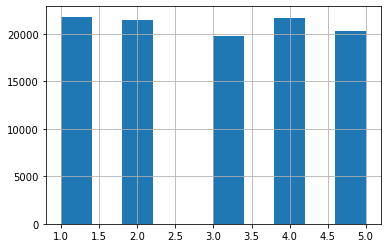

In [32]:
df.Popularity.hist()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105086 entries, 0 to 154930
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Acousticness      105086 non-null  float64 
 1   Danceability      105086 non-null  float64 
 2   Duration          105086 non-null  int64   
 3   Energy            105086 non-null  float64 
 4   Explicit          105086 non-null  int64   
 5   Instrumentalness  105086 non-null  float64 
 6   Liveness          105086 non-null  float64 
 7   Loudness          105086 non-null  float64 
 8   Mode              105086 non-null  int64   
 9   Popularity        105086 non-null  category
 10  Speechiness       105086 non-null  float64 
 11  Tempo             105086 non-null  float64 
 12  TimeSignature     105086 non-null  int64   
 13  Valence           105086 non-null  float64 
 14  counts            105086 non-null  int64   
dtypes: category(1), float64(9), int64(5)
memory usage: 

In [34]:
df.tail()

,Acousticness,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,TimeSignature,Valence,counts
154926,0.333000,0.747,200733,0.649,0,0.000000,0.1720,-6.218,0,5,0.2190,88.011,4,0.840,119
154927,0.314000,0.469,204507,0.631,0,0.000000,0.1400,-6.569,0,5,0.0853,91.418,4,0.763,119
154928,0.467000,0.778,212307,0.590,0,0.000000,0.0902,-5.548,1,5,0.2700,97.995,4,0.515,119
154929,0.110000,0.726,190293,0.731,0,0.000003,0.0928,-6.304,0,5,0.1590,170.125,4,0.430,119
154930,0.000245,0.631,209120,0.796,0,0.011500,0.3800,-5.350,1,5,0.0401,92.469,4,0.596,119


In [35]:
#df = np.array_split(df, 3)

In [36]:
#df = df[2]

In [37]:
df.tail()

,Acousticness,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,TimeSignature,Valence,counts
154926,0.333000,0.747,200733,0.649,0,0.000000,0.1720,-6.218,0,5,0.2190,88.011,4,0.840,119
154927,0.314000,0.469,204507,0.631,0,0.000000,0.1400,-6.569,0,5,0.0853,91.418,4,0.763,119
154928,0.467000,0.778,212307,0.590,0,0.000000,0.0902,-5.548,1,5,0.2700,97.995,4,0.515,119
154929,0.110000,0.726,190293,0.731,0,0.000003,0.0928,-6.304,0,5,0.1590,170.125,4,0.430,119
154930,0.000245,0.631,209120,0.796,0,0.011500,0.3800,-5.350,1,5,0.0401,92.469,4,0.596,119


In [38]:
df.Popularity.value_counts()

1    21816
4    21679
2    21427
5    20341
3    19823
Name: Popularity, dtype: int64

In [39]:
df = df.sample(n=10000, random_state = 8).reset_index(drop = True)

#### Use the columns to create both the test and the training data sets

In [40]:
#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['Popularity']), 
    df.Popularity,
    test_size=0.2,
    random_state=32,
    #stratify = df.Genre
)
X_train.shape,  y_train.shape, X_test.shape,  y_test.shape

((8000, 14), (8000,), (2000, 14), (2000,))

In [41]:
#For demonstrations purposes, keep the predictions aside so you can evaluate the results
toPredict = df[-3:].copy()
prediction = df[-3:].copy()
#prediction = yScaler.inverse_transform( prediction )

#remove future predictions from dataset
trainX = X_train[:-3].copy()
trainY = y_train[:-3].copy()

trainX.shape, trainY.shape, toPredict.shape, prediction.shape

((7997, 14), (7997,), (3, 15), (3, 15))

In [42]:
toPredict.drop(columns = 'Popularity', inplace =True)

In [43]:
#no categorical attributes for this data set (nice to have in case data changes)
cat_attribs = []#'Genre', 'GrammyAward']

#set the numerical attributes
num_attribs = list( X_train.drop(columns=[]))#'Genre', 'GrammyAward']) )

#define pipeline for numeric attributes (this code is just a definition)
#each numeric attribute will be imputated using the Median strategy
#each numeric attribute will be scaled 
num_pipeline = Pipeline( [
    ('imputer', SimpleImputer(strategy="median")), #because no missing values, not used
    ('std_scaler', StandardScaler()),   
] )

#define the pipeline process for the data set
full_pipeline = ColumnTransformer( [
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(sparse=False), cat_attribs)      #because no categorical attributes, not used 
])

In [44]:
#create an array of prepared data based on the training data set
X_train = full_pipeline.fit_transform( X_train)
X_train.shape

(8000, 14)

In [45]:
#create an array of prepared data based on the test data set
X_test = full_pipeline.transform( X_test)
X_test.shape

(2000, 14)

In [46]:
#create an array of prepared data based on the test data set
toPredict = full_pipeline.transform(toPredict)
toPredict.shape

(3, 14)

## Clustering

### Create X data set

In [47]:
X = full_pipeline.fit_transform(df)
X.shape

(10000, 14)

## <font color=blue>K-Means

Let's train a K-Means cluster on this data set. It will try to find each blob's center and assign each instance to the closest blob.

## <font color=red>How many clusters?

### Plot Inertia & Silhouette Coefficient

To determine an ideal <i>k</i> value, need to look where there is low inertia (mean square error between each instance & centroid) and a high (close to 1) silhouette coefficient (proximity to cluster boundries)

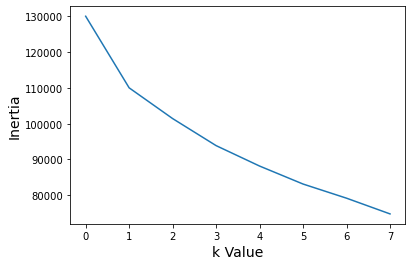

--------------------------------------------------------------------------------


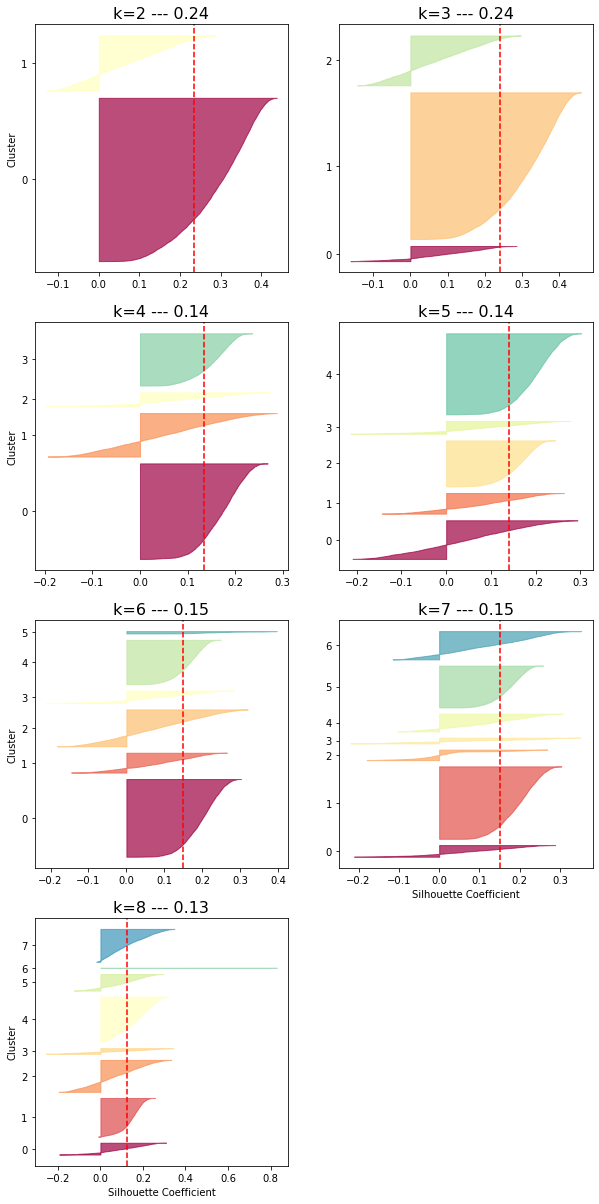

In [48]:
#use this function to evaluate your X data across different k values
#NOTE: this function can take a little time especially if your k value list has numbers > 20
inertia_silhouette_plot(X, [2, 3, 4, 5, 6, 7, 8])

In [49]:
k = 3

#create the model
kmeans = KMeans(n_clusters=k, random_state=42)

#fit the model and predict y values (i.e. cluster value)
y_pred = kmeans.fit_predict(X)

Each instance was assigned to one of the k clusters

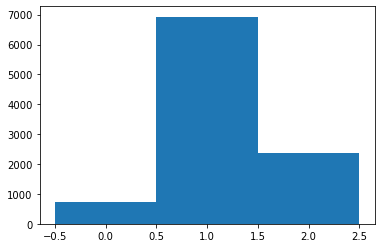

In [50]:
#plot the number of instances in each of the created clusters
plt.hist(y_pred, bins=range(k+1), align='left')
plt.show()

In [51]:
#save the predictions of each instance to a column called KMeans
df[ "KMeans"] = y_pred

In [52]:
#explore some of the clusters
df[ df.KMeans == 1]

,Acousticness,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,TimeSignature,Valence,counts,KMeans
1,0.1740,0.691,150622,0.595,0,0.000000,0.1480,-10.815,0,3,0.3030,139.840,4,0.278,312,1
3,0.0670,0.705,228000,0.865,0,0.000000,0.2460,-4.400,1,4,0.1320,161.095,4,0.526,365,1
4,0.2490,0.515,77667,0.863,0,0.000000,0.1200,-4.231,1,2,0.0559,132.346,4,0.577,417,1
6,0.0245,0.495,278387,0.894,0,0.031800,0.1860,-3.955,0,4,0.2390,164.315,4,0.432,70,1
9,0.0471,0.653,224120,0.758,0,0.000000,0.0747,-4.521,1,3,0.0840,130.031,4,0.532,94,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,0.0800,0.300,341027,0.664,0,0.000000,0.0813,-5.937,1,1,0.0661,160.158,3,0.281,82,1
9992,0.5140,0.451,325120,0.598,0,0.000081,0.2060,-4.618,1,5,0.0364,134.933,4,0.160,49,1
9995,0.6490,0.397,126387,0.604,0,0.000000,0.6140,-7.371,0,4,0.3200,201.729,4,0.918,479,1
9996,0.3730,0.516,232867,0.597,0,0.000000,0.1220,-4.635,1,5,0.0323,140.017,4,0.230,69,1


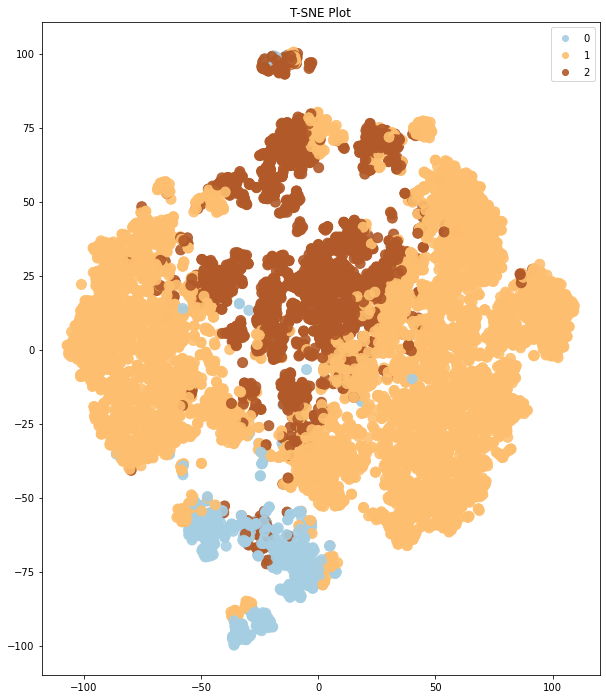

In [53]:
#plot DBSCAN results on a 2-dimensional tSNE of the same data set
tsne_plot(X, y_pred)

In [54]:
pd.set_option("display.max_colwidth",3000)
df[ df.KMeans == 1].describe()

,Acousticness,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Speechiness,Tempo,TimeSignature,Valence,counts,KMeans
count,6930.000000,6930.000000,6.930000e+03,6930.000000,6930.0,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.0
mean,0.129766,0.610489,2.375440e+05,0.742445,0.0,0.011932,0.267978,-6.307333,0.648196,0.134444,122.529852,3.979365,0.549592,241.817605,1.0
std,0.161237,0.157602,7.299593e+04,0.149884,0.0,0.050296,0.240183,2.361197,0.477568,0.134218,29.707701,0.257672,0.218857,224.598528,0.0
min,0.000004,0.075900,1.788000e+04,0.106000,0.0,0.000000,0.012500,-17.082000,0.000000,0.022300,38.214000,1.000000,0.035900,21.000000,1.0
25%,0.010700,0.506000,1.982430e+05,0.634000,0.0,0.000000,0.102000,-7.620750,0.000000,0.039100,96.592000,4.000000,0.382000,109.000000,1.0
50%,0.063150,0.621000,2.299445e+05,0.754000,0.0,0.000000,0.172000,-5.972500,1.000000,0.069200,121.992000,4.000000,0.556500,172.000000,1.0
75%,0.190000,0.725000,2.665368e+05,0.866000,0.0,0.000196,0.340000,-4.652250,1.000000,0.199000,142.065250,4.000000,0.721000,311.000000,1.0
max,0.903000,0.984000,1.864831e+06,0.997000,0.0,0.514000,1.000000,0.157000,1.000000,0.949000,219.776000,5.000000,0.988000,1797.000000,1.0


In [55]:
#explore some of the clusters
Df1 = df.describe()
Df2 = df[df.KMeans == 0].describe()
Df1.compare(Df2)

Acousticness              Danceability                   Duration  \
               self       other          self       other           self   
count  10000.000000  716.000000  10000.000000  716.000000   10000.000000   
mean       0.257645    0.177915      0.578978    0.536060  235987.621100   
std        0.296085    0.287880      0.168072    0.184002  127146.535817   
min        0.000000    0.000001           NaN         NaN    3428.000000   
25%        0.018200    0.000620      0.471000    0.420000  189909.750000   
50%        0.118000    0.012500      0.589000    0.556000  227073.500000   
75%        0.437000    0.254250      0.699000    0.665000  267896.750000   
max        0.995000    0.994000      0.984000    0.934000            NaN   

                            Energy             Explicit         \
               other          self       other     self  other   
count     716.000000  10000.000000  716.000000  10000.0  716.0   
mean   319298.787709      0.644690    0.684843      NaN    NaN   
std    369108.656137      0.232162    0.245455      NaN    NaN   
min      4013.000000      0.000709    0.006030      NaN    NaN   
25%    194100.250000      0.489000    0.512750      NaN    NaN   
50%    269667.000000      0.683000    0.750000      NaN    NaN   
75%    383687.000000      0.835000    0.895250      NaN    NaN   
max              NaN      0.997000    0.995000      NaN    NaN   

      Instrumentalness                  Liveness                  Loudness  \
                  self       other          self       other          self   
count     10000.000000  716.000000  10000.000000  716.000000  10000.000000   
mean          0.069229    0.757366      0.264169    0.227630     -7.991474   
std           0.209331    0.172699      0.241986    0.227002      4.092892   
min                NaN         NaN           NaN         NaN    -43.909000   
25%           0.000000    0.672000      0.103000    0.090225     -9.832250   
50%           0.000004    0.809000      0.159000    0.126000     -7.007000   
75%           0.001090    0.889250      0.336000    0.285250     -5.167000   
max                NaN         NaN      1.000000    0.989000      0.157000   

                           Mode               Speechiness              \
            other          self       other          self       other   
count  716.000000  10000.000000  716.000000  10000.000000  716.000000   
mean    -9.613003      0.678800    0.572626      0.123933    0.061357   
std      4.355364      0.466961    0.495043      0.150879    0.051775   
min    -35.857000           NaN         NaN           NaN         NaN   
25%    -11.399250           NaN         NaN      0.035400    0.036975   
50%     -8.716500           NaN         NaN      0.054700    0.047000   
75%     -6.820000           NaN         NaN      0.150000    0.063725   
max     -2.135000           NaN         NaN      0.962000    0.691000   

              Tempo             TimeSignature                   Valence  \
               self       other          self       other          self   
count  10000.000000  716.000000  10000.000000  716.000000  10000.000000   
mean     119.659106  124.307587      3.904400    3.903631      0.497410   
std       30.494352   25.113822      0.462906    0.443051      0.239404   
min             NaN         NaN           NaN         NaN           NaN   
25%       95.020750  109.786500           NaN         NaN      0.308750   
50%      119.932500  128.001000           NaN         NaN      0.497000   
75%      139.848750  135.996000           NaN         NaN      0.687000   
max             NaN         NaN           NaN         NaN      0.988000   

                         counts                    KMeans         
            other          self       other          self  other  
count  716.000000  10000.000000  716.000000  10000.000000  716.0  
mean     0.361991    333.353100  651.013966      1.163800    0.0  
std      0.254503    364.057799  617.274578      0.529

## <font color=blue>DBSCAN 

#### Requires the use of an Epsilon value

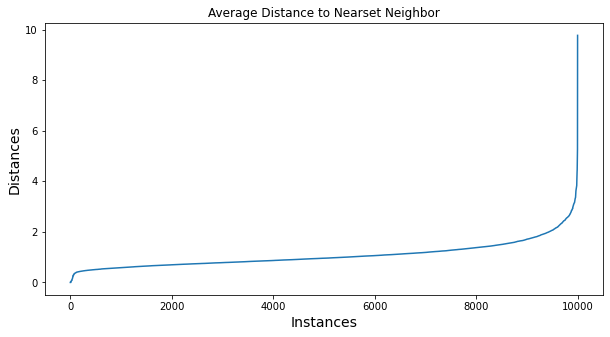

In [56]:
#But how to determine a good epsilon?
#one method is to review the Avg. Distances to Nearest Neighbor graph and find its "elbow point"
nn_avg_distance(X)

In [57]:
#And then once you know the range for your epsilon, use a loop to try out a few values
for e in range(1, 50, 5):
    epsilon = e / 10
    dbscan = DBSCAN(eps=epsilon, min_samples=100)      #epsilon defines the neighborhood distance
    dbscan.fit(X)
    print(epsilon, "-", set(list(dbscan.labels_)))

0.1 - {-1}
0.6 - {-1}
1.1 - {0, -1}
1.6 - {0, 1, -1}
2.1 - {0, 1, 2, -1}
2.6 - {0, -1}
3.1 - {0, -1}
3.6 - {0, -1}
4.1 - {0, -1}
4.6 - {0, -1}


#### Defines clusters using continuous regions of high density but not able to predict 

In [58]:
#create and fit the model
dbscan = DBSCAN(eps=2.1, min_samples=100)      #epsilon defines the neighborhood distance
dbscan.fit(X)

DBSCAN(eps=2.1, min_samples=100)

In [59]:
y_pred=dbscan.labels_
set(list(y_pred))

{-1, 0, 1, 2}

In [60]:
#save the predictions of each instance to a column called DBSCAN
df[ 'DBSCAN' ] = y_pred

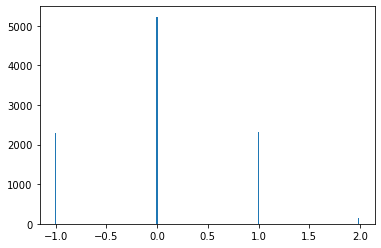

In [61]:
#plot the number of instances in each of the created clusters
plt.hist(y_pred, bins=210, align='left')
plt.show()

In [62]:
df[ y_pred == 0]

,Acousticness,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,TimeSignature,Valence,counts,KMeans,DBSCAN
0,0.8190,0.576,298307,0.652,0,0.000000,0.3470,-5.455,1,3,0.0329,115.968,4,0.2700,764,2,0
3,0.0670,0.705,228000,0.865,0,0.000000,0.2460,-4.400,1,4,0.1320,161.095,4,0.5260,365,1,0
4,0.2490,0.515,77667,0.863,0,0.000000,0.1200,-4.231,1,2,0.0559,132.346,4,0.5770,417,1,0
8,0.5750,0.757,331067,0.371,0,0.000015,0.1150,-9.337,1,3,0.0323,105.881,4,0.6860,256,2,0
9,0.0471,0.653,224120,0.758,0,0.000000,0.0747,-4.521,1,3,0.0840,130.031,4,0.5320,94,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,0.8390,0.335,554067,0.182,0,0.003790,0.0833,-13.462,1,2,0.0325,108.397,4,0.0562,95,2,0
9992,0.5140,0.451,325120,0.598,0,0.000081,0.2060,-4.618,1,5,0.0364,134.933,4,0.1600,49,1,0
9996,0.3730,0.516,232867,0.597,0,0.000000,0.1220,-4.635,1,5,0.0323,140.017,4,0.2300,69,1,0
9997,0.6820,0.674,228107,0.587,0,0.000000,0.3610,-7.986,1,2,0.1870,78.002,4,0.6710,94,1,0


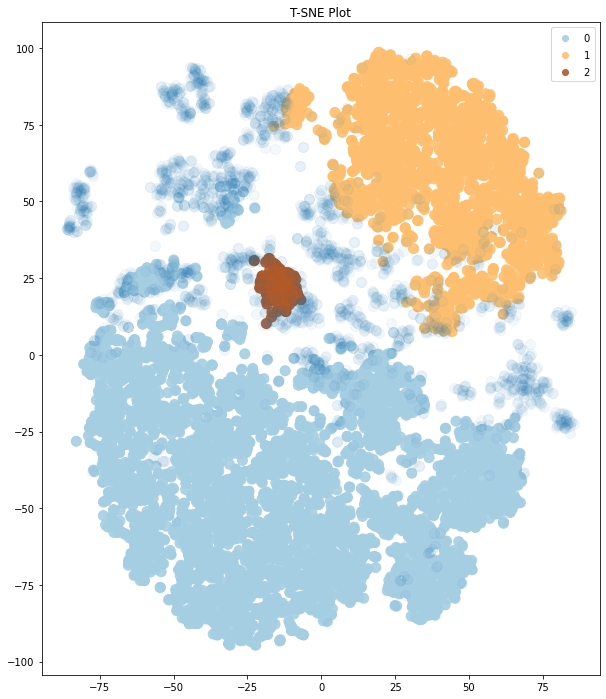

In [63]:
#plot DBSCAN results on a 2-dimensional tSNE of the same data set
tsne_plot(X, y_pred)

# <font color=red>How many clusters?

## <font color=blue>Bayesian Guassian Mixture

#### Supports finding the k value for Gaussian Mixture models

In [64]:
# create a model and fit X

#set the k value to your best guess (or higher)
#n_init defines how many times to fit the model
bgm = BayesianGaussianMixture(n_components=10, n_init=5)  
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=5)

In [65]:
#let's look at the weights to possible clusters and zero to all unneeded clusters
weights = np.round(bgm.weights_,2)
weights

array([0.01, 0.23, 0.05, 0.03, 0.02, 0.07, 0.5 , 0.06, 0.01, 0.02])

In [66]:
#calculate the ideal k value (or just count the values above)
k = len(set(list(weights)))
k

8

## <font color=blue>Gaussian Mixture

Using a probalistic model that clusters based on instances having similar Gaussian (i.e. normal) distribution

In [67]:
#Let's train a Gaussian Mixture on this dataset. 
k = 8
gauss = GaussianMixture(n_components=k, random_state=42)
y_pred = gauss.fit_predict(X)

In [68]:
#save the predictions of each instance to a column called Gauss
df['Gauss'] = y_pred

In [69]:
#the most likely cluster (hard clustering) predictions made
y_pred

array([4, 6, 2, ..., 4, 4, 2], dtype=int64)

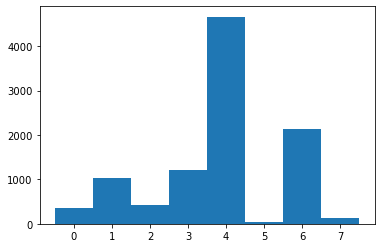

In [70]:
#plot the number of instances in each of the created clusters
plt.hist(y_pred, bins=range(k+1), align='left')
plt.show()

In [71]:
df[ y_pred == 4 ]

,Acousticness,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,TimeSignature,Valence,counts,KMeans,DBSCAN,Gauss
0,0.8190,0.576,298307,0.652,0,0.000000,0.347,-5.455,1,3,0.0329,115.968,4,0.270,764,2,0,4
3,0.0670,0.705,228000,0.865,0,0.000000,0.246,-4.400,1,4,0.1320,161.095,4,0.526,365,1,0,4
4,0.2490,0.515,77667,0.863,0,0.000000,0.120,-4.231,1,2,0.0559,132.346,4,0.577,417,1,0,4
7,0.9610,0.553,246120,0.305,0,0.000001,0.667,-11.962,1,1,0.3060,152.239,4,0.632,1434,2,-1,4
8,0.5750,0.757,331067,0.371,0,0.000015,0.115,-9.337,1,3,0.0323,105.881,4,0.686,256,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,0.0461,0.770,219404,0.641,0,0.000000,0.344,-8.423,1,3,0.3420,136.996,4,0.674,157,1,0,4
9992,0.5140,0.451,325120,0.598,0,0.000081,0.206,-4.618,1,5,0.0364,134.933,4,0.160,49,1,0,4
9996,0.3730,0.516,232867,0.597,0,0.000000,0.122,-4.635,1,5,0.0323,140.017,4,0.230,69,1,0,4
9997,0.6820,0.674,228107,0.587,0,0.000000,0.361,-7.986,1,2,0.1870,78.002,4,0.671,94,1,0,4


## <font color=blue>Analyze Cluster Assignments

In [72]:
df.head()

,Acousticness,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,TimeSignature,Valence,counts,KMeans,DBSCAN,Gauss
0,0.819,0.576,298307,0.652,0,0.000000,0.347,-5.455,1,3,0.0329,115.968,4,0.270,764,2,0,4
1,0.174,0.691,150622,0.595,0,0.000000,0.148,-10.815,0,3,0.3030,139.840,4,0.278,312,1,1,6
2,0.575,0.482,201627,0.332,0,0.000006,0.981,-9.473,0,4,0.0533,111.422,3,0.563,94,2,-1,2
3,0.067,0.705,228000,0.865,0,0.000000,0.246,-4.400,1,4,0.1320,161.095,4,0.526,365,1,0,4
4,0.249,0.515,77667,0.863,0,0.000000,0.120,-4.231,1,2,0.0559,132.346,4,0.577,417,1,0,4


In [73]:
#remove any ticker that was assigned a -1 during DBSCAN
pairedTickers = df[ df.DBSCAN != -1 ]

#group the data by their Gauss, KMeans and DBSCAN values and then take a count
pairedTickers = pairedTickers.groupby(by=['Gauss','KMeans','DBSCAN']).count()

#keep only those combinations that had more than 1 Stock Ticker
pairedTickers = pairedTickers[pairedTickers.Popularity>1]

#display the paired combinations
pairedTickers['Popularity'].head(10)

Gauss  KMeans  DBSCAN
0      2       2           2
1      0       0          13
               1          21
       1       0         263
               1         128
       2       0          14
               1           6
2      1       1         204
       2       1          15
3      0       0          13
Name: Popularity, dtype: int64

In [74]:
#explore a particular "cluster"
df[ (df.Gauss== 1) & (df.KMeans==0) & (df.DBSCAN == 0) ]
#explore some of the clusters
Df1 = df.describe()
Df2 = df[ (df.Gauss== 1) & (df.KMeans==0) & (df.DBSCAN == 0) ].describe()
Df1.compare(Df2)

Acousticness             Danceability                 Duration  \
               self      other          self      other          self   
count  10000.000000  13.000000  10000.000000  13.000000  1.000000e+04   
mean       0.257645   0.045277      0.578978   0.675462  2.359876e+05   
std        0.296085   0.056904      0.168072   0.094882  1.271465e+05   
min        0.000000   0.000063      0.000000   0.458000  3.428000e+03   
25%        0.018200   0.002500      0.471000   0.624000  1.899098e+05   
50%        0.118000   0.010900      0.589000   0.664000  2.270735e+05   
75%        0.437000   0.073300      0.699000   0.742000  2.678968e+05   
max        0.995000   0.159000      0.984000   0.836000  4.763247e+06   

                            Energy            Explicit       Instrumentalness  \
               other          self      other     self other             self   
count      13.000000  10000.000000  13.000000  10000.0  13.0     10000.000000   
mean   322649.846154      0.644690   0.754615      NaN   NaN         0.069229   
std    114392.752951      0.232162   0.133951      NaN   NaN         0.209331   
min    167244.000000      0.000709   0.471000      NaN   NaN         0.000000   
25%    264387.000000      0.489000   0.703000      NaN   NaN         0.000000   
50%    296600.000000      0.683000   0.767000      NaN   NaN         0.000004   
75%    386013.000000      0.835000   0.832000      NaN   NaN         0.001090   
max    521916.000000      0.997000   0.930000      NaN   NaN         0.998000   

                      Liveness                 Loudness             \
           other          self      other          self      other   
count  13.000000  10000.000000  13.000000  10000.000000  13.000000   
mean    0.529692      0.264169   0.170246     -7.991474  -7.260462   
std     0.108013      0.241986   0.103385      4.092892   1.844013   
min     0.357000      0.000000   0.068100    -43.909000  -9.831000   
25%     0.443000      0.103000   0.094200     -9.832250  -8.928000   
50%     0.526000      0.159000   0.126000     -7.007000  -7.385000   
75%     0.592000      0.336000   0.281000     -5.167000  -5.895000   
max     0.715000      1.000000   0.357000      0.157000  -3.535000   

               Mode         Speechiness                    Tempo              \
               self other          self      other          self       other   
count  10000.000000  13.0  10000.000000  13.000000  10000.000000   13.000000   
mean       0.678800   1.0      0.123933   0.060454    119.659106  127.781077   
std        0.466961   0.0      0.150879   0.033976     30.494352   10.742616   
min        0.000000   1.0      0.000000   0.027400      0.000000  105.097000   
25%        0.000000   1.0      0.035400   0.034100     95.020750  126.977000   
50%             NaN   NaN      0.054700   0.053700    119.932500  128.002000   
75%             NaN   NaN      0.150000   0.075200    139.848750  134.985000   
max             NaN   NaN      0.962000   0.153000    232.412000  144.690000   

      TimeSignature             Valence                   counts              \
               self other          self      other          self       other   
count  10000.000000  13.0  10000.000000  13.000000  10000.000000   13.000000   
mean       3.904400   4.0      0.497410   0.400900    333.353100  300.153846   
std        0.462906   0.0      0.239404   0.226164    364.057799  234.921209   
min        0.000000   4.0      0.000000   0.036700     21.000000   65.000000   
25%             NaN   NaN      0.308750   0.264000    118.000000  212.000000   
50%             NaN   NaN      0.497000   0.347000    197.000000  265.000000   
75%             NaN   NaN      0.687000   0.476000    405.000000  299.000000   
max        5.000000   4.0      0.988000   0.868000   1797.000000  995.000000   

             KMeans              DBSCAN               Gauss        
               self other          self other          self other  
count  10000.000000  13.0 

#### Use the columns to create both the test and the training data sets

In [75]:
#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['Popularity']), 
    df.Popularity,
    test_size=0.2,
    random_state=32,
    #stratify = df.Artist
)
X_train.shape,  y_train.shape, X_test.shape,  y_test.shape

((8000, 17), (8000,), (2000, 17), (2000,))

In [76]:
#For demonstrations purposes, keep the predictions aside so you can evaluate the results
toPredict = df[-3:].copy()
prediction = df[-3:].copy()
#prediction = yScaler.inverse_transform( prediction )

#remove future predictions from dataset
trainX = X_train[:-3].copy()
trainY = y_train[:-3].copy()

trainX.shape, trainY.shape, toPredict.shape, prediction.shape

((7997, 17), (7997,), (3, 18), (3, 18))

In [77]:
toPredict.drop(columns = 'Popularity', inplace =True)

In [78]:
#no categorical attributes for this data set (nice to have in case data changes)
cat_attribs = []#'Genre', 'GrammyAward']

#set the numerical attributes
num_attribs = list( X_train.drop(columns=[]))#'Genre', 'GrammyAward']) )

#define pipeline for numeric attributes (this code is just a definition)
#each numeric attribute will be imputated using the Median strategy
#each numeric attribute will be scaled 
num_pipeline = Pipeline( [
    ('imputer', SimpleImputer(strategy="median")), #because no missing values, not used
    ('std_scaler', StandardScaler()),   
] )

#define the pipeline process for the data set
full_pipeline = ColumnTransformer( [
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(sparse=False), cat_attribs)      #because no categorical attributes, not used 
])

In [79]:
#create an array of prepared data based on the training data set
X_train = full_pipeline.fit_transform( X_train)
X_train.shape

(8000, 17)

In [80]:
#create an array of prepared data based on the test data set
X_test = full_pipeline.transform( X_test)
X_test.shape

(2000, 17)

In [81]:
#create an array of prepared data based on the test data set
toPredict = full_pipeline.transform( toPredict)
X_test.shape

(2000, 17)

## <font color=blue>Logistic Regression

### Train and Evaluate Model using Training Data

In [556]:
#create a linear regression model
log_reg=LogisticRegression(C=5)      #regularization is defined by 1/C so a lower C value, a higher level of regularization

#fit the model to the training data set
log_reg.fit(X_train, y_train)

#calculated the accuracy (i.e. predicted vs. actual for the training data set)
acc = log_reg.score(X_train, y_train)
print('Accuracy: {:.2f}%'.format(acc*100))

Accuracy: 27.91%


In [557]:
#use cross valudation to process the data 10 different ways using the logsitic regression model generated above
scores = cross_val_score(log_reg, X_train, y_train, cv=10)

# look at average across all folds
print('Accuracy: {:.2f}%'.format( scores.mean()*100 ) )

Accuracy: 26.99%


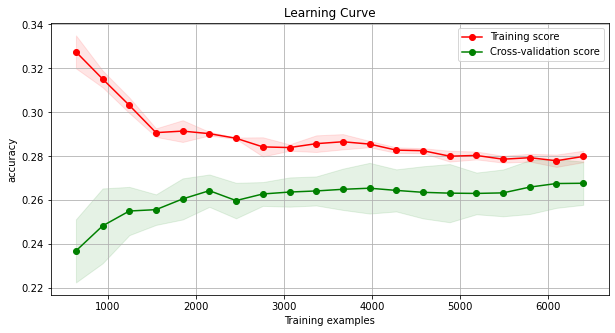

In [558]:
#review the learning curve
plot_learning_curve(log_reg, X_train, y_train, scoring="accuracy")

### Evaluate Model on Test Set

In [559]:
#calculated the accuracy (i.e. predicted vs. actual for the test data set)
acc = log_reg.score(X_test, y_test)
print('Accuracy: {:.2f}%'.format(acc*100))

Accuracy: 26.45%


## <font color=blue>Tune LogisticRegression</font>

In [560]:
#create a parameter grid that determines the variable hyperparameters
param_grid = [
    {'solver': ['saga', 'newton-cg', 'lbfgs', 'sag'],
     'multi_class': ['ovr', 'multinomial'],
     'C': [.5, 1, 2]
    }
]

# train across 10 folds, that's a total of (4*6)*10=240 rounds of training 
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=10,
                           scoring='accuracy',
                           return_train_score=True)

#fit the data to the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'C': [0.5, 1, 2],
                          'multi_class': ['ovr', 'multinomial'],
                          'solver': ['saga', 'newton-cg', 'lbfgs', 'sag']}],
             return_train_score=True, scoring='accuracy')

In [561]:
#display the results of the GridSearchCV
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("Accuracy: {:,.2f}% - {}".format( mean_score*100, params) )

Accuracy: 26.84% - {'C': 0.5, 'multi_class': 'ovr', 'solver': 'saga'}
Accuracy: 26.84% - {'C': 0.5, 'multi_class': 'ovr', 'solver': 'newton-cg'}
Accuracy: 26.84% - {'C': 0.5, 'multi_class': 'ovr', 'solver': 'lbfgs'}
Accuracy: 26.84% - {'C': 0.5, 'multi_class': 'ovr', 'solver': 'sag'}
Accuracy: 26.98% - {'C': 0.5, 'multi_class': 'multinomial', 'solver': 'saga'}
Accuracy: 26.98% - {'C': 0.5, 'multi_class': 'multinomial', 'solver': 'newton-cg'}
Accuracy: 26.97% - {'C': 0.5, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Accuracy: 26.98% - {'C': 0.5, 'multi_class': 'multinomial', 'solver': 'sag'}
Accuracy: 26.82% - {'C': 1, 'multi_class': 'ovr', 'solver': 'saga'}
Accuracy: 26.82% - {'C': 1, 'multi_class': 'ovr', 'solver': 'newton-cg'}
Accuracy: 26.84% - {'C': 1, 'multi_class': 'ovr', 'solver': 'lbfgs'}
Accuracy: 26.82% - {'C': 1, 'multi_class': 'ovr', 'solver': 'sag'}
Accuracy: 27.00% - {'C': 1, 'multi_class': 'multinomial', 'solver': 'saga'}
Accuracy: 27.00% - {'C': 1, 'multi_class': 'm

In [562]:
#display the best solution
grid_search.best_params_

{'C': 1, 'multi_class': 'multinomial', 'solver': 'saga'}

### Create the best LogisticRegression Model

In [563]:
#use the parameters found above to create the model
model = LogisticRegression(**grid_search.best_params_)

#fit the model to the training data set
model.fit(X_train, y_train)

#calculated the accuracy (i.e. predicted vs. actual for the training data set)
acc = model.score(X_train, y_train)
print('Accuracy: {:.2f}%'.format(acc*100))

Accuracy: 27.90%


In [564]:
#use cross valudation to process the data 10 different ways using the logsitic regression model generated above
scores = cross_val_score(model, X_train, y_train, cv=10)

# look at average across all folds
print('Accuracy: {:.2f}%'.format( scores.mean()*100 ) )

Accuracy: 27.00%


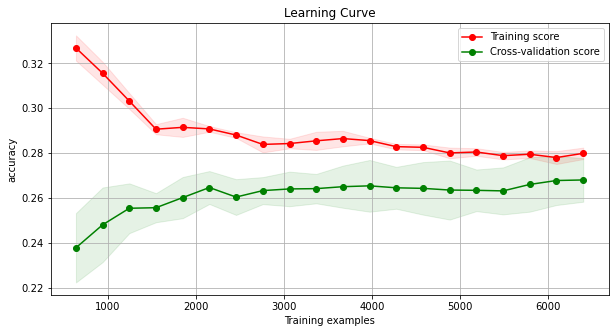

In [565]:
plot_learning_curve(model, X_train, y_train, scoring='accuracy')

### Evaluate Best Model on Test Set

In [566]:
#calculated the accuracy (i.e. predicted vs. actual for the test data set)
acc = model.score(X_test, y_test)
print('Accuracy: {:.2f}%'.format(acc*100))

Accuracy: 26.45%


### Measure Prediction across different Folds and Review the Confusion Matrix

In [567]:
#get predictions aross 3 different folds using the default method (prediction scores)
y_train_pred = cross_val_predict(model, X_train, y_train, cv=3)

In [568]:
#display the confusion matrix
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[495, 313, 141, 272, 390],
       [373, 370, 124, 346, 456],
       [260, 261, 149, 349, 453],
       [223, 290, 142, 431, 598],
       [163, 219,  87, 397, 698]], dtype=int64)

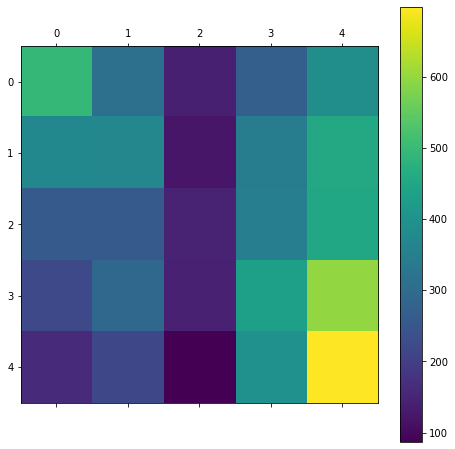

In [569]:
#plot the confusion matrix
plot_confusion_matrix(conf_mx)

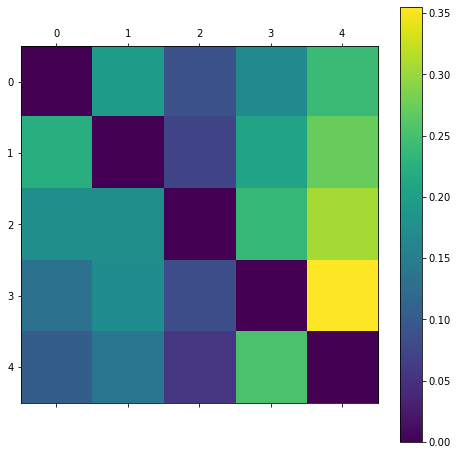

In [570]:
#plot the errors
#divide each value in the confusion matrix by the # of images in that corresponding class
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx/row_sums

#plot the matrix to see where there are problems 
np.fill_diagonal(norm_conf_mx,0)  #fill diagonal with zeros to see problems more clearly
plot_confusion_matrix(norm_conf_mx)
#rows represent the actuals and columns represent the prediction

### Prediction

In [571]:
#Predict using the model
y_prediction = model.predict( toPredict )

In [572]:
#print( "Prediction ${:,.2f}".format( float(y_prediction)))
y_prediction

array([2, 5, 1], dtype=int64)

In [573]:
prediction = prediction['Popularity']

In [574]:
#print the error
print( y_prediction, '\n', prediction) 

[2 5 1] 
 9997    2
9998    5
9999    4
Name: Popularity, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


## <font color=blue>Try SGDClassifier</font>

### Train and Evaluate Model using Training Data

In [575]:
#create the classification model
SGDC = SGDClassifier()

#fit the model using the training data set
SGDC.fit(X_train, y_train)

#compare the predicted to the actuals
acc = SGDC.score(X_train, y_train)
print('Accuracy: {:.2f}%'.format(acc*100))

Accuracy: 22.32%


In [576]:
#see how well the model peforms across a variety of cross sections
score = cross_val_score(SGDC, X_train, y_train, cv=3, scoring="accuracy")
print(" Accuracy Score: {:.2f}%".format(np.mean(score)*100))

 Accuracy Score: 22.80%


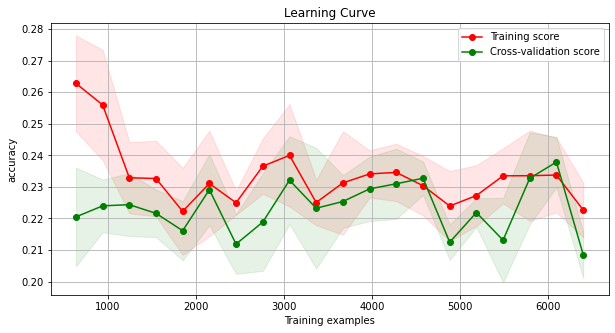

In [577]:
plot_learning_curve(SGDC, X_train, y_train, scoring='accuracy')

### Evaluate Model on Test Set

In [578]:
#calculated the accuracy (i.e. predicted vs. actual for the test data set)
acc = SGDC.score(X_test, y_test)
print('Accuracy: {:.2f}%'.format(acc*100))

Accuracy: 21.20%


### Prediction

In [579]:
#Predict using the model
y_prediction = SGDC.predict( toPredict )

In [580]:
#print( "Prediction ${:,.2f}".format( float(y_prediction)))
y_prediction

array([4, 2, 1], dtype=int64)

In [581]:
#print the error
print( y_prediction, '\n', prediction) 

[4 2 1] 
 9997    2
9998    5
9999    4
Name: Popularity, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


## <font color=blue>Try DecisionTreeClassifier</font>

### Train and Evaluate Model using Training Data

In [582]:
#create the classification model
tree_clf = DecisionTreeClassifier()

#fit the model using the training data set
tree_clf.fit(X_train, y_train)

#compare the predicted to the actuals
acc = tree_clf.score(X_train, y_train)
print('Accuracy: {:.2f}%'.format(acc*100))

Accuracy: 99.98%


In [583]:
#see how well the model peforms across a variety of cross sections
score = cross_val_score(tree_clf, X_train, y_train, cv=3, scoring="accuracy")
print(" Accuracy Score: {:.2f}%".format(np.mean(score)*100))

 Accuracy Score: 25.11%


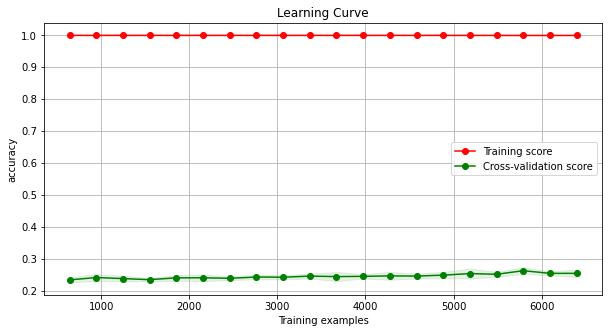

In [584]:
plot_learning_curve(tree_clf, X_train, y_train, scoring='accuracy')

### Evaluate Model on Test Set

In [585]:
#calculated the accuracy (i.e. predicted vs. actual for the test data set)
acc = tree_clf.score(X_test, y_test)
print('Accuracy: {:.2f}%'.format(acc*100))

Accuracy: 26.30%


### Prediction

In [586]:
#Predict using the model
y_prediction = model.predict( toPredict )

In [587]:
#print( "Prediction ${:,.2f}".format( float(y_prediction)))
y_prediction

array([2, 5, 1], dtype=int64)

In [588]:
#print the error
print( y_prediction, '\n', prediction) 

[2 5 1] 
 9997    2
9998    5
9999    4
Name: Popularity, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


## <font color=blue>Try RandomForestClassifier</font>

### Train and Evaluate Model using Training Data

In [589]:
#create the classification model
forest_clf = RandomForestClassifier(n_estimators=100, random_state=50)

#fit the model using the training data set
forest_clf.fit(X_train, y_train)

#compare the predicted to the actuals
acc = forest_clf.score(X_train, y_train)
print('Accuracy: {:.2f}%'.format(acc*100))

Accuracy: 99.98%


In [590]:
#see how well the model peforms across a variety of cross sections
score = cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")
print(" Accuracy Score: {:.2f}%".format(np.mean(score)*100))

 Accuracy Score: 28.59%


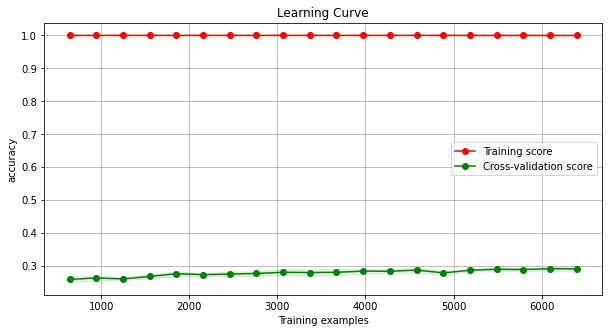

In [591]:
plot_learning_curve(forest_clf, X_train, y_train, scoring='accuracy')

### Evaluate Model on Test Set

In [592]:
#calculated the accuracy (i.e. predicted vs. actual for the test data set)
acc = forest_clf.score(X_test, y_test)
print('Accuracy: {:.2f}%'.format(acc*100))

Accuracy: 27.95%


## <font color=blue>Tune RandomForestClassifier</font>

In [593]:
#create a parameter grid that determines the variable hyperparameters
param_grid = [
    {'criterion':['gini'],
     'n_estimators': [10,100,1000],
     'max_features': ["auto"]
    }
]

# train across 10 folds, that's a total of (2*3*3)*10=180 rounds of training 
grid_search = GridSearchCV(RandomForestClassifier(random_state=50), param_grid, cv=4,
                           scoring='accuracy',
                           return_train_score=True)

#fit the data to the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=50),
             param_grid=[{'criterion': ['gini'], 'max_features': ['auto'],
                          'n_estimators': [10, 100, 1000]}],
             return_train_score=True, scoring='accuracy')

In [594]:
#print the RMSE results from the CV and the paramaters used during each run 
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("Accuracy: {:,.2f}% - {}".format( mean_score*100, params) )

Accuracy: 27.06% - {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 10}
Accuracy: 29.15% - {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 100}
Accuracy: 30.32% - {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 1000}


In [595]:
#display the best soluiton
grid_search.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 1000}

### Create the best RandomForestClassifier

In [596]:
#use the parameters found above to create the model
model = RandomForestClassifier(**grid_search.best_params_)

#fit the model to the training data set
model.fit(X_train, y_train)

#compare the predicted to the actuals
acc = model.score(X_train, y_train)
print('Accuracy: {:.2f}%'.format(acc*100))

Accuracy: 99.98%


In [597]:
#see how well the model peforms across a variety of cross sections
score = cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")
print(" Accuracy Score: {:.2f}%".format(np.mean(score)*100))

 Accuracy Score: 28.59%


KeyboardInterrupt: 

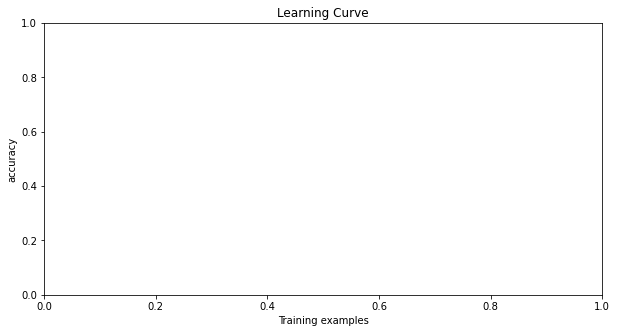

In [598]:
plot_learning_curve(model, X_train, y_train,scoring="accuracy")

### Evaluate best RandomForestClassifier on Test Set

In [599]:
#calculated the accuracy (i.e. predicted vs. actual for the test data set)
acc = model.score(X_test, y_test)
print('Accuracy: {:.2f}%'.format(acc*100))

Accuracy: 29.95%


### Prediction

In [600]:
#Predict using the model
y_prediction = model.predict( toPredict )

In [601]:
#print( "Prediction ${:,.2f}".format( float(y_prediction)))
y_prediction

array([2, 5, 4], dtype=int64)

In [602]:
#print the error
print( y_prediction, '\n', prediction) 

[2 5 4] 
 9997    2
9998    5
9999    4
Name: Popularity, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


## <font color=blue>Run Principal Component Analysis and evaluate the # of Features

In [603]:
#create a PCA object
pca = PCA()

#fit the data to the PCA
pca.fit(X_train)

PCA()

In [604]:
pca.explained_variance_ratio_

array([2.16183314e-01, 1.40927174e-01, 9.44391521e-02, 8.36690500e-02,
       7.29465023e-02, 6.45296565e-02, 5.81395360e-02, 5.43891956e-02,
       4.93144661e-02, 4.08816521e-02, 3.31684130e-02, 2.90747752e-02,
       2.31769436e-02, 2.06923078e-02, 9.83150607e-03, 8.63635592e-03,
       8.03455917e-34])

In [605]:
#determine the number of features/dimensions required to preserve 95% of the training set's variance
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

13

In [606]:
#another (easier) way to use this value and reduce the features is as follows:
pca = PCA(n_components=.95)

#now use this PCA object to reduce the dataset
X_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [607]:
#note that we have the same number of features
pca.n_components_

13

In [608]:
#and at 95% variance
np.sum(pca.explained_variance_ratio_)

0.9608398302186976

In [609]:
#let's see how it impacted our features
X_reduced.shape

(8000, 13)

### Train and Evaluate Model using Training Data

In [610]:
#create the classification model
forest_clf = RandomForestClassifier(**grid_search.best_params_)

#fit the model using the training data set
forest_clf.fit(X_reduced, y_train)

#compare the predicted to the actuals
acc = forest_clf.score(X_reduced, y_train)
print('Accuracy: {:.2f}%'.format(acc*100))

Accuracy: 99.98%


In [611]:
#see how well the model peforms across a variety of cross sections
score = cross_val_score(forest_clf, X_reduced, y_train, cv=3, scoring="accuracy")
print(" Accuracy Score: {:.2f}%".format(np.mean(score)*100))

 Accuracy Score: 26.76%


KeyboardInterrupt: 

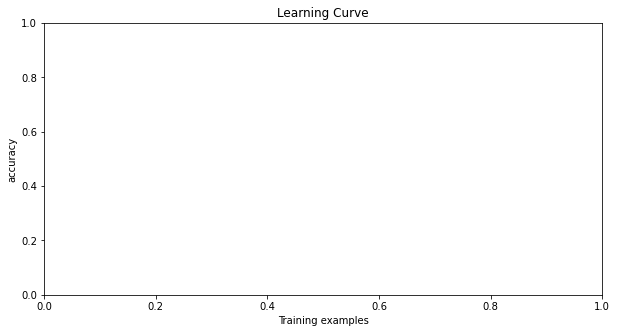

In [612]:
plot_learning_curve(forest_clf, X_train, y_train, scoring='accuracy')

### Evaluate Model on Test Set

In [ ]:
#calculated the accuracy (i.e. predicted vs. actual for the test data set)
acc = model.score(X_test, y_test)
print('Accuracy: {:.2f}%'.format(acc*100))

### Prediction

In [ ]:
#Predict using the model
y_prediction = model.predict( toPredict )

In [ ]:
#print( "Prediction ${:,.2f}".format( float(y_prediction)))
y_prediction

In [ ]:
#print the error
print( y_prediction, '\n', prediction) 

## <font color=blue>t-Distributed Stochastic Neighbor Embedding (t-SNE) 

In [613]:
#NOTE - this will take some time
#to minimize the time, you can control the number of examples/instances (n) to use
n = 1000

In [614]:
#create a t-SNE model
tsne = TSNE(n_components=2)

#fit the first n test data to this model (using test to minimize the number of instances)
tsne_data = tsne.fit_transform(X_test[:n])

KeyboardInterrupt: 

In [ ]:
# Ploting the result of tsne
plt.figure(figsize=(10,10))
p = plt.scatter( tsne_data[:,0], tsne_data[:,1], alpha=.85, c=y_test[:n], cmap = cm.Paired)
plt.legend(handles=p.legend_elements()[0], labels=range(10), loc="upper right", fontsize=14)   
plt.title('T-SNE of MNIST Data',fontsize=14)
plt.xlabel("Dimension 1", fontsize=14)
plt.ylabel("Dimension 2", fontsize=14)            
plt.show()


### Split data set

In [615]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['Popularity']), 
    df.Popularity, 
    test_size=.2, 
    random_state=32,
)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8000, 17), (8000,), (2000, 17), (2000,))

### Prepare the data

In [616]:
#no categorical attributes for this data set (nice to have in case data changes)
cat_attribs = []#'Genre', 'GrammyAward']

#set the numerical attributes
num_attribs = list( df.drop(columns=['Popularity']))# 'Genre', 'GrammyAward']) )

#define pipeline for numeric attributes (this code is just a definition)
#each numeric attribute will be imputated using the Median strategy
#each numeric attribute will be scaled 
num_pipeline = Pipeline( [   
 ('imputer', SimpleImputer(strategy="mean")),
 ('std_scaler', MinMaxScaler()),   
])

#define the column transformation process for the data set
full_pipeline = ColumnTransformer( [
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(sparse = False), cat_attribs) 
])

In [617]:
#create an array of prepared data based on the training data set
X_train = full_pipeline.fit_transform( X_train)
X_test = full_pipeline.transform(X_test )
#Predict = full_pipeline.transform(toPredict)

X_train.shape, X_test.shape #Predict.shape

((8000, 17), (2000, 17))

In [618]:
#For demonstrations purposes, keep the predictions aside so you can evaluate the results
toPredict = df[-3:].copy()
prediction = df[-3:].copy()
#prediction = yScaler.inverse_transform( prediction )

#remove future predictions from dataset
trainX = X_train[:-3].copy()
trainY = y_train[:-3].copy()

trainX.shape, trainY.shape, toPredict.shape, prediction.shape

((7997, 17), (7997,), (3, 18), (3, 18))

In [619]:
toPredict.drop(columns = 'Popularity', inplace =True)

In [620]:
#create an array of prepared data based on the test data set
toPredict = full_pipeline.transform( toPredict)
toPredict.shape

(3, 17)

In [621]:
#scale the Y data
yscaler = MinMaxScaler()
y_train = yscaler.fit_transform(np.array(y_train).reshape(-1,1))
y_test = yscaler.transform(np.array(y_test).reshape(-1,1))
y_predict = yscaler.transform(np.array(toPredict).reshape(-1,1))

### Build the Neural Network, Compile & Train

In [82]:
early_stopping = keras.callbacks.EarlyStopping(
patience = 5,
mode='min',
monitor='val_loss'
)

In [83]:
#starting by setting random seeds and restarting keras blackend session
np.random.seed(42)
tf.random.set_seed(42)

#resets the Keras global state - helps avoid clutter from old models and layers, especially when memory is limited
keras.backend.clear_session()

In [84]:
#build a simple model keeping the last layer with activation softmax and 3 to predict games into 1 of 3 classes
model = keras.models.Sequential([
    keras.layers.Flatten(),   #NOTE: Ok to leave out input shape - it will determine when reading X
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(5, activation="softmax")
])

In [85]:
#After model is created, it needs to be compiled - this requires setting
#the loss function for multi-class (sparse_categorical_crossentropy when Y is all numbers) 
#metric to measure performance is accuracy

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_ratepred),
              metrics=['accuracy']
             )

In [86]:
#fit the model and capture the details of the fit to a variable called history
#note that validation data will be created dynamically as 20% of the training data set
history = model.fit(X_train, 
                    y_train, 
                    epochs=1000, 
                    validation_split=.2,
                    callbacks=[early_stopping]
                   )

Epoch 1/1000


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\Users\ajbut\anaconda3.1\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\ajbut\anaconda3.1\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\ajbut\anaconda3.1\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\ajbut\anaconda3.1\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\ajbut\anaconda3.1\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\ajbut\anaconda3.1\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\ajbut\anaconda3.1\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\ajbut\anaconda3.1\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\ajbut\anaconda3.1\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\ajbut\anaconda3.1\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\Users\ajbut\anaconda3.1\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\Users\ajbut\anaconda3.1\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\Users\ajbut\anaconda3.1\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\Users\ajbut\anaconda3.1\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\ajbut\anaconda3.1\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\ajbut\anaconda3.1\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "C:\Users\ajbut\anaconda3.1\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "C:\Users\ajbut\anaconda3.1\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\ajbut\anaconda3.1\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\ajbut\anaconda3.1\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\ajbut\anaconda3.1\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ajbut\AppData\Local\Temp/ipykernel_21824/334194611.py", line 3, in <module>
      history = model.fit(X_train,
    File "C:\Users\ajbut\anaconda3.1\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ajbut\anaconda3.1\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\ajbut\anaconda3.1\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "C:\Users\ajbut\anaconda3.1\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ajbut\anaconda3.1\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "C:\Users\ajbut\anaconda3.1\lib\site-packages\keras\engine\training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\ajbut\anaconda3.1\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
      return self.compiled_loss(
    File "C:\Users\ajbut\anaconda3.1\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\ajbut\anaconda3.1\lib\site-packages\keras\losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\ajbut\anaconda3.1\lib\site-packages\keras\losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\ajbut\anaconda3.1\lib\site-packages\keras\losses.py", line 1862, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\ajbut\anaconda3.1\lib\site-packages\keras\backend.py", line 5202, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 5 which is outside the valid range of [0, 5).  Label values: 1 1 4 3 1 3 1 5 5 2 5 1 3 4 2 1 1 4 3 3 3 3 4 1 1 3 5 2 4 4 5 5
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_656]

### Evaluate Performance

In [ ]:
#plot the loss learning curve
nn_plot_learning_curve(history)

In [ ]:
#evaluate model loss metric on the training set
model.evaluate(X_train, y_train)

In [ ]:
#evaluate model loss metric on the Test set
model.evaluate(X_test, y_test)

In [ ]:
#evaluate performance of Training set
accuracy = model.evaluate(X_train, y_train)
print('Loss: {:.2f}  ---  Accuracy: {:.2f}%'.format( accuracy[0], accuracy[1]*100 ) )

In [ ]:
#evaluate performance of Test set
accuracy = model.evaluate(X_test, y_test)
print('Loss: {:.2f}  ---  Accuracy: {:.2f}%'.format( accuracy[0], accuracy[1]*100 ) )

### Prediction

In [ ]:
#see the actual predicted values
np.argmax( model.predict(X_test[0:5]) , axis=1)

In [ ]:
#predict the test data set based on SCALED values
x = model.predict(toPredict)

In [ ]:
#print using format
for x in range(0,3):
    print( "Prediction {:10,.0f}".format(x))

In [ ]:
print(x)